In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Check Outlires in the columns Age and EstimatedSalary columns

In [11]:
Q1 = np.percentile(df['Age'],25,interpolation = 'midpoint')
Q3 = np.percentile(df['Age'],75,interpolation = 'midpoint')
IQR = Q3 - Q1
Upper = (df['Age']>=(Q3+1.5*IQR))
Lower = (df['Age']<=(Q1-1.5*IQR))
print(np.where(Upper))
print(np.where(Lower))
# No outliers in Age

(array([], dtype=int64),)
(array([], dtype=int64),)


In [12]:
Q1 = np.percentile(df['EstimatedSalary'],25,interpolation = 'midpoint')
Q3 = np.percentile(df['EstimatedSalary'],75,interpolation = 'midpoint')
IQR = Q3 - Q1
Upper = (df['EstimatedSalary']>=(Q3+1.5*IQR))
Lower = (df['EstimatedSalary']<=(Q1-1.5*IQR))
print(np.where(Upper))
print(np.where(Lower))
# No outliers in EstimatedSalary

(array([], dtype=int64),)
(array([], dtype=int64),)


# encoding the Gender Column

In [13]:
df['Gender'] = df['Gender'].map({'Male':0 ,'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


# Fitting K-NN to the Training set

# Splitting the dataset into the Training set and Test set

In [18]:
X = df[['Gender','Age','EstimatedSalary']].values
y = df['Purchased'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Fitting the kNN model

In [21]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_train_scaled,y_train)
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  score :  0.859375
K value  :  2  score :  0.834375
K value  :  3  score :  0.884375
K value  :  4  score :  0.884375
K value  :  5  score :  0.896875
K value  :  6  score :  0.884375
K value  :  7  score :  0.8875
K value  :  8  score :  0.89375
K value  :  9  score :  0.896875
K value  :  10  score :  0.896875
K value  :  20  score :  0.8875
K value  :  50  score :  0.765625


For k=5 we have 89% of accuracy.

In [23]:
knn = KNeighborsClassifier(5) 
knn.fit(X_train_scaled, y_train) 
print("Train Accuracy : ", knn.score(X_train_scaled,y_train)) 
print("Cross Val Accuracy : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

Train Accuracy :  0.909375
Cross Val Accuracy :  0.896875


# Predicting the Test set results

In [24]:
results = knn.predict(X_test_scaled)
results

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': results})
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


# Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,results)

array([[55,  3],
       [ 1, 21]], dtype=int64)

# Visualization

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

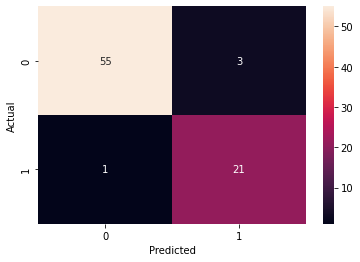

In [27]:
confusion_matrix = pd.crosstab(y_test, results, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)